In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys
os.environ['DEBUG'] = '2'  # a slightly verbose debugging setting

In [3]:
import jax
from housemaze import maze
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes

from functools import partial
from housemaze.human_dyna import experiments as housemaze_experiments
import os.path
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

from IPython.display import display, Markdown
from nicewebrl import stages as nice_stages

import matplotlib.pyplot as plt
import experiment_1 as experiment


No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
Compiling jax environment functions.
	time: 1.1260178089141846
Compiling multi-render function.
	time: 0.06144523620605469


# Manipulation 1:

## shortcut

 A shortcut is introduced

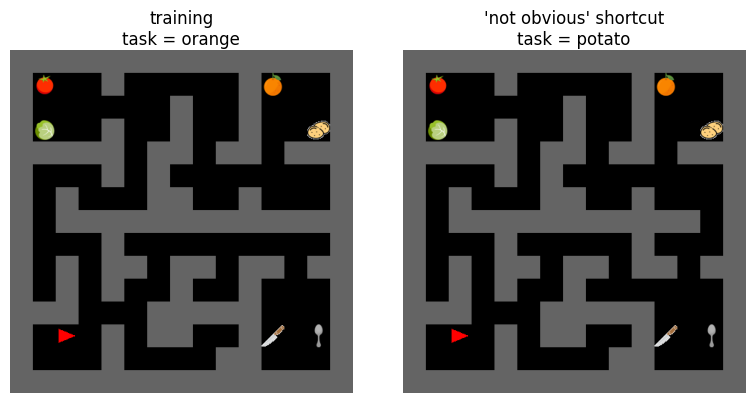

# Manipulation 2:

## faster when on-path but further than off-path but closer

 
        In both tests, a shortcut is introduced. In the first, the agent is tested on the same path it trained on. In the second, the agent is tested on a different path.
        

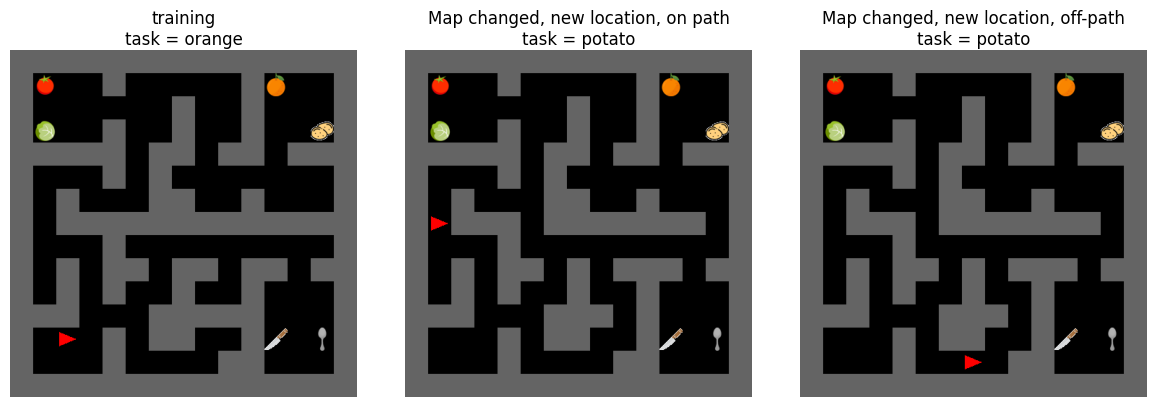

# Manipulation 3:

## reusing longer of two paths matching training path

 
        Here there are two paths to the test object. We predict that people will take the path that was used to get to the training object.
        

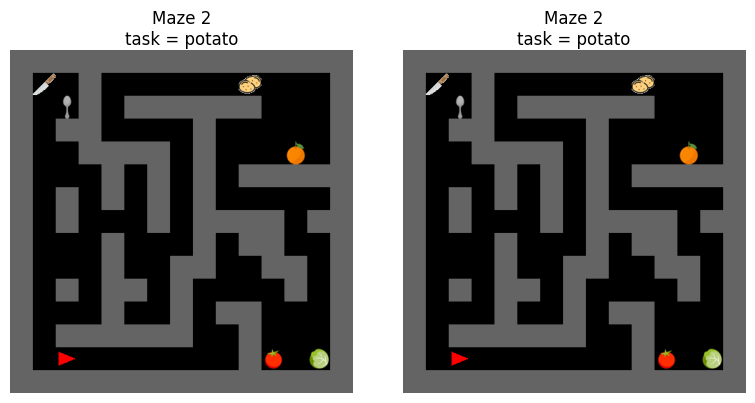

# Manipulation 4:

## probing for planning near goal

 
            At test time, we'll change the location of the off-task object so it's equidistant from path during training.
            We'll first query when the off-task object is in the same location as during training. We'll then query again with it being in a different locaiton.
            

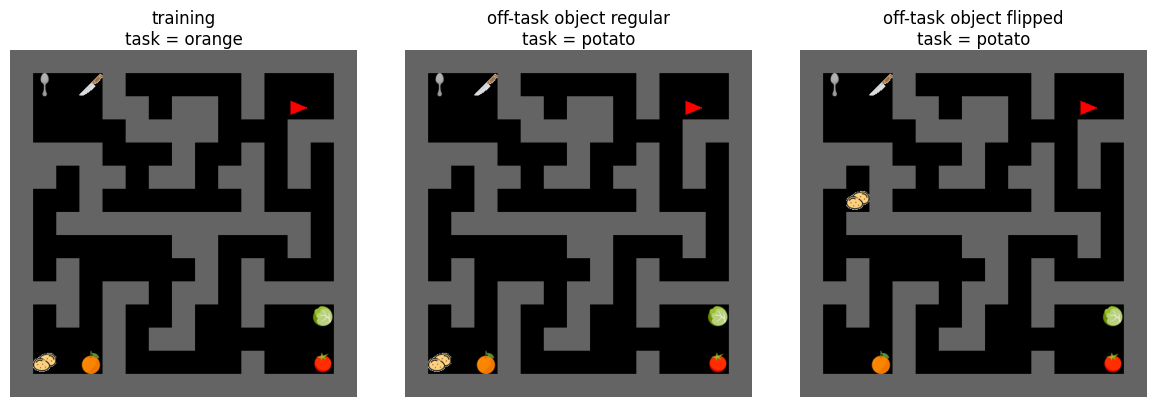

In [6]:
image_keys = experiment.image_keys
manipulation_group = experiment.groups[0]
train_object = manipulation_group[0]
test_object = manipulation_group[1]

def create_env_stage_figure(env_stages):
    num_stages = len(env_stages)
    fig, axes = plt.subplots(1, num_stages, figsize=(4*num_stages, 4))
    
    if num_stages == 1:
        axes = [axes]  # Make axes iterable if there's only one subplot
    
    rng = jax.random.PRNGKey(42)
    
    for ax, stage in zip(axes, env_stages):
        timestep = stage.web_env.reset(rng, stage.env_params)
        image = experiment.render_fn(timestep)
        
        ax.imshow(image)
        ax.axis('off')
        title = stage.metadata.get('desc', '') or stage.name
        if stage.metadata['eval']:
            category = image_keys[test_object]
        else:
            category = image_keys[train_object]
        title += f'\ntask = {category}'

        ax.set_title(title, wrap=True)
    
    plt.tight_layout()
    return fig

for block in experiment.all_blocks:
    display(Markdown(f"# Manipulation {block.metadata['manipulation']}:"))
    display(Markdown(f"## {block.metadata['desc']}"))
    display(Markdown(f" {block.metadata.get('long')}"))
    env_stages = [stage for stage in block.stages if isinstance(stage, nice_stages.EnvStage)]
    # [print(stage.metadata) for stage in block.stages]
    create_env_stage_figure(env_stages)
    plt.show()
